In [17]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\Manjusha K\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


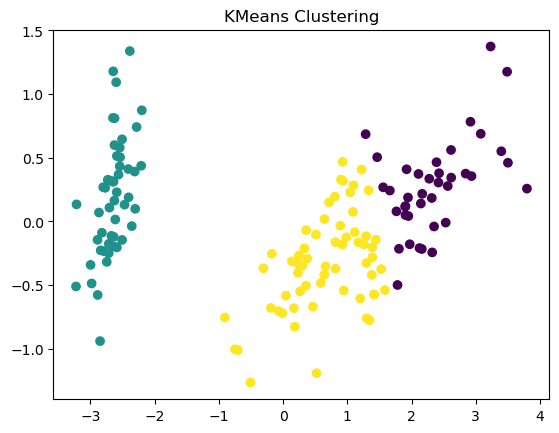

In [18]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
labels = kmeans.labels_
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df)
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels)
plt.title("KMeans Clustering")
plt.show()

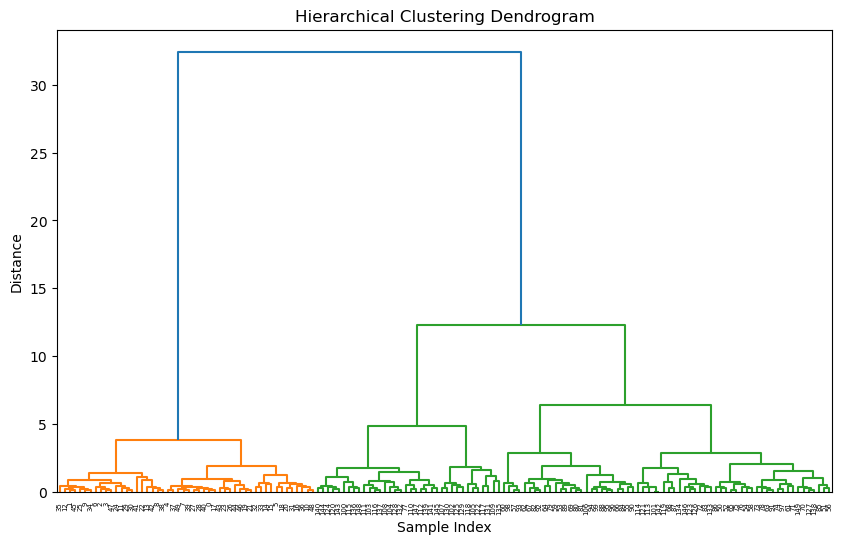

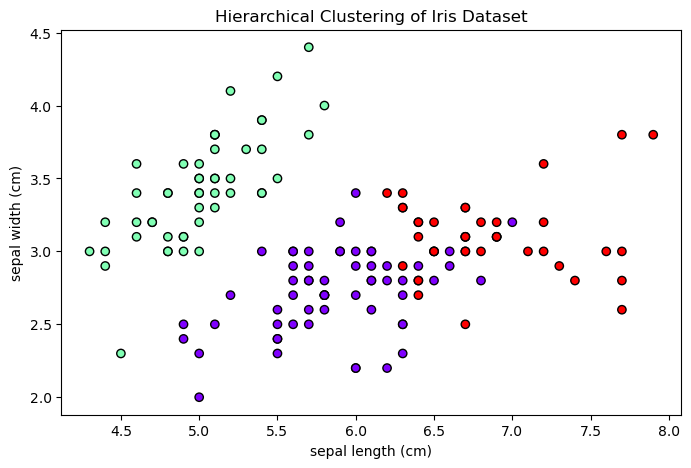

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
Z = linkage(df.iloc[:, :-1], method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
agg_cluster = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = agg_cluster.fit_predict(df.iloc[:, :-1])
plt.figure(figsize=(8, 5))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Hierarchical_Cluster'], cmap='rainbow', marker='o', edgecolor='k')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
